<a href="https://colab.research.google.com/github/lumagri/Python_to_Data_Science/blob/main/7_Data_Visualization_Exploring_with_seaborn/Tips_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando base de dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('tips.csv')

In [3]:
dados.head(10)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


#Tradução dos dados

In [4]:
dados.columns #verificando os nomes das colunas

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip' : 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia',
    'time' : 'horario',
    'size' : 'total_de_pessoas'
}

In [6]:
type(dados)

pandas.core.frame.DataFrame

In [7]:
tips = dados.rename(columns = renomear)

In [8]:
tips.head(1)

,valor_da_conta,gorjeta,sobremesa,dia,horario,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [9]:
tips.sobremesa.unique() # unique() apresenta todos os dados possíveis dessa coluna. 

array(['No', 'Yes'], dtype=object)

In [10]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [11]:
#para fazer a tradução dos valores dos dados é necessário mapear e inserir o dicionário criado.
tips.sobremesa.map(sim_nao)


0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [12]:
# precisa inserir o map na variável sobremesa. sobremesa precisa receber o map. 
tips.head(1)

,valor_da_conta,gorjeta,sobremesa,dia,horario,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [13]:
tips.sobremesa = tips.sobremesa.map(sim_nao)
tips.head(1)
#agora sim da foi alterado. 

,valor_da_conta,gorjeta,sobremesa,dia,horario,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [14]:
tips.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [15]:
#Criar o dicionário
dias = {'Sun':'Domingo', 
        'Sat': 'Sábado', 
        'Thur': 'Quinta', 
        'Fri': 'Sexta'
    
}

In [16]:
tips.dia = tips.dia.map(dias)
tips.head(3)

,valor_da_conta,gorjeta,sobremesa,dia,horario,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3


In [17]:
tips.dia.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [18]:
tips.horario.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [19]:
#Criar o dicionário
refeicao = {'Dinner': 'Jantar', 
            'Lunch': 'Almoço'
}

In [20]:
tips.horario = tips.horario.map(refeicao)

In [21]:
tips.horario.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [22]:
tips.head()

,valor_da_conta,gorjeta,sobremesa,dia,horario,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


#Importando o seaborn


In [23]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 KB 5.3 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [24]:
import seaborn as sns

In [25]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.8/dist-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: missingno


#Análise 1 - Valor da conta e gorjeta

In [26]:
tips.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia', 'horario',
       'total_de_pessoas'],
      dtype='object')

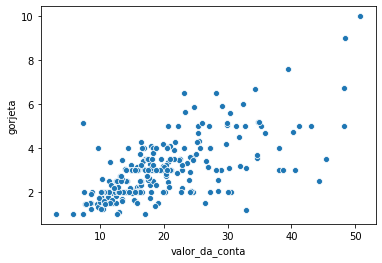

In [27]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=tips)

**Visualmente o valor da gorjeta aumenta conforme o valor da conta**

In [28]:
print('A base de dados contém {} registros \n'.format(tips.shape[0]))
print('Registros não nulos')
tips.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia                 244
horario             244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [29]:
tips.head()

,valor_da_conta,gorjeta,sobremesa,dia,horario,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [30]:
tips['porcentagem'] = tips['gorjeta'] / tips['valor_da_conta']

In [31]:
tips.head()

,valor_da_conta,gorjeta,sobremesa,dia,horario,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [32]:
tips.porcentagem = tips.porcentagem.round(2)

In [33]:
tips.head()

,valor_da_conta,gorjeta,sobremesa,dia,horario,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


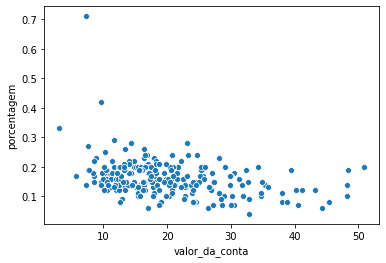

In [34]:
porcentagem_conta = sns.scatterplot(x= 'valor_da_conta', y = 'porcentagem', data= tips)

** Visualmente o valor da conta não é proporcional ao valor da gorjeta.

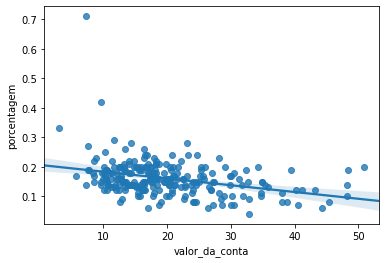

In [35]:
#Gerando um gráfico no formato linha
porcentagem_conta_linha = sns.regplot(x='valor_da_conta', y='porcentagem', data=tips)


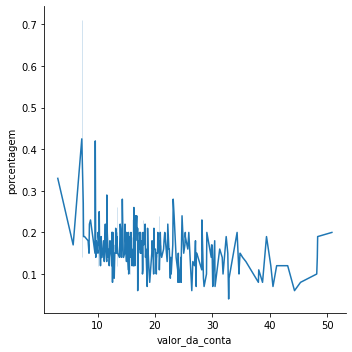

In [36]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=tips)

#Análise II - Sobremesa

Será que a sobremesa influencia no valor da gorjeta?

In [37]:
tips.head()

,valor_da_conta,gorjeta,sobremesa,dia,horario,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [41]:
#Para verificar uma resposta específica de uma das colunas.
tips[tips.sobremesa == 'Sim']
#Foram encontradas 93 linhas em que as comandas continham sobremesa == 'Sim'

,valor_da_conta,gorjeta,sobremesa,dia,horario,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [42]:
tips[tips.sobremesa == 'Sim'].describe()
#Descrição dos dados de quem pediu sobremesa. 

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [43]:
tips[tips.sobremesa == 'Não'].describe()
#Descrição dos dados de quem não pediu sobremesa. 

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


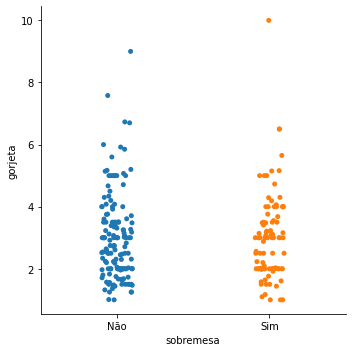

In [44]:
sns.catplot(x='sobremesa', y= 'gorjeta', data= tips)

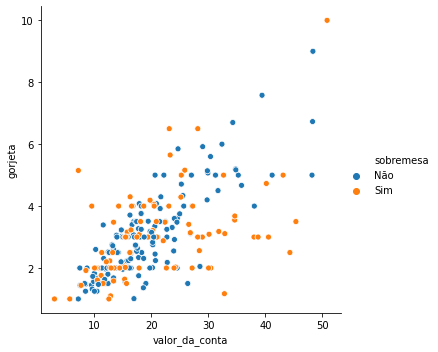

In [45]:
sns.relplot(x='valor_da_conta', y= 'gorjeta', hue='sobremesa', data= tips)

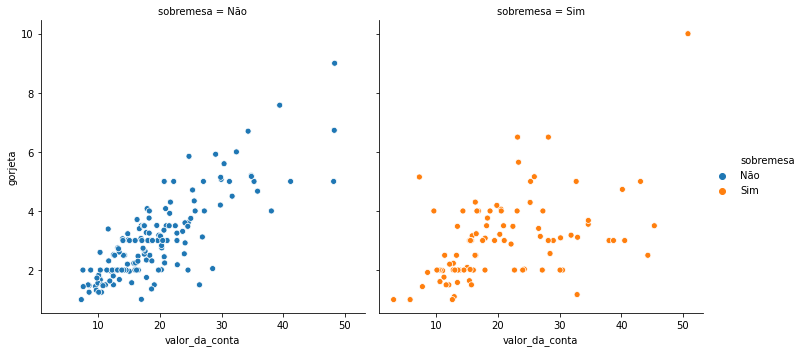

In [46]:
sns.relplot(x='valor_da_conta', y= 'gorjeta', hue='sobremesa',col= 'sobremesa', data= tips)

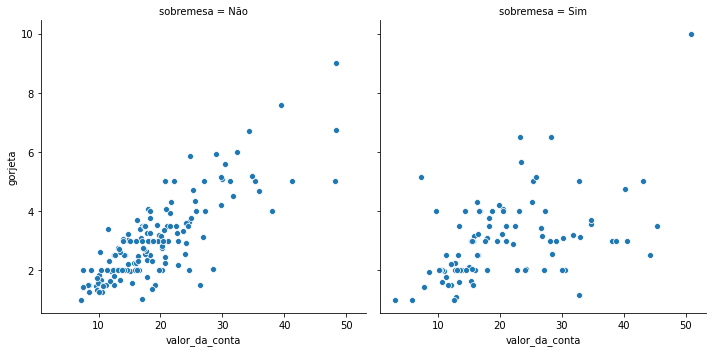

In [47]:
sns.relplot(x='valor_da_conta', y= 'gorjeta',col= 'sobremesa', data= tips)

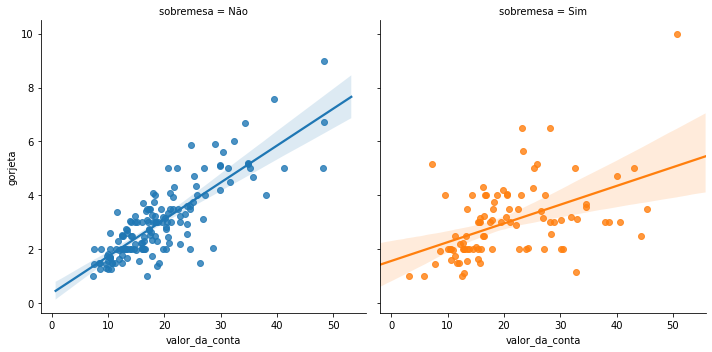

In [48]:
sns.lmplot(x='valor_da_conta', y= 'gorjeta', hue='sobremesa',col= 'sobremesa', data= tips)

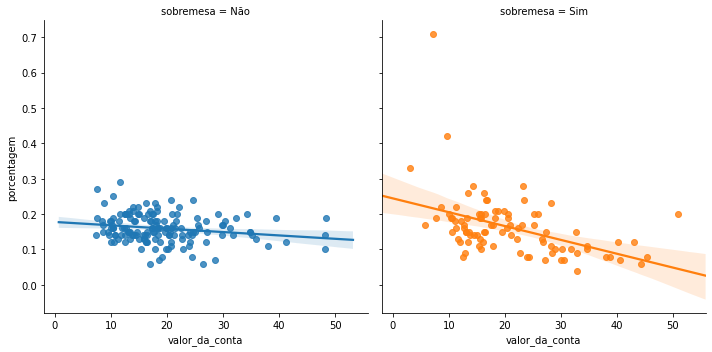

In [49]:
sns.lmplot(x='valor_da_conta', y= 'porcentagem', hue='sobremesa',col= 'sobremesa', data= tips)

visualmente existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e os que não pediram sobremesa. 

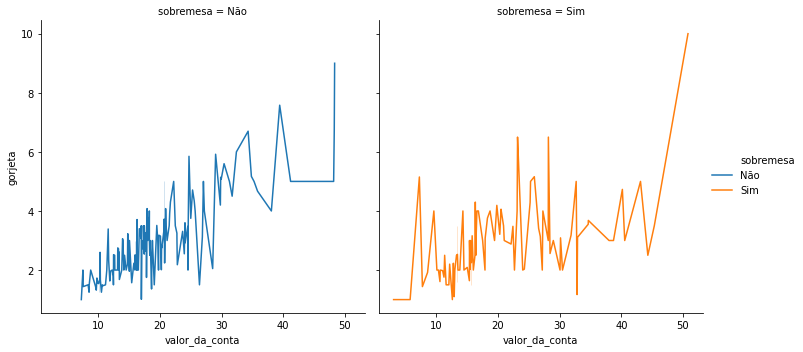

In [50]:
sns.relplot(x='valor_da_conta', y= 'gorjeta', hue='sobremesa',col= 'sobremesa', kind='line',  data= tips)

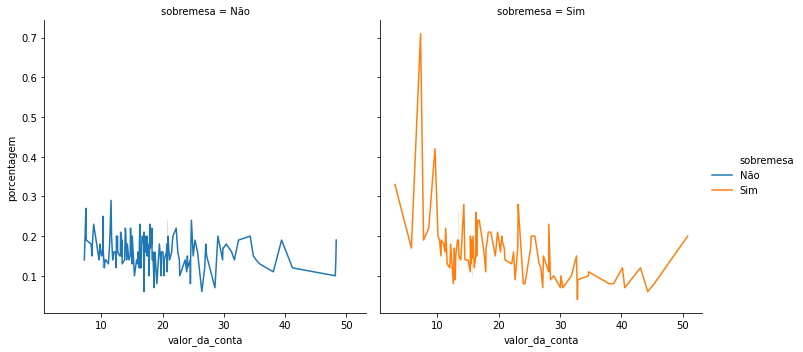

In [51]:
sns.relplot(x='valor_da_conta', y= 'porcentagem', hue='sobremesa',col= 'sobremesa', kind='line',  data= tips)

##Teste de hipótese

**H<sup>null</sup>**
>A distribuição da taxa da gorjeta é a mesma nos dois grupos

**H<sup>alt</sup>**
>A distribuição da taxa da gorjeta não é a mesma nos dois grupos

In [52]:
from scipy.stats import ranksums

In [54]:
sobremesa = tips.query("sobremesa =='Sim'").porcentagem

In [55]:
sem_sobremesa = tips.query("sobremesa =='Não'").porcentagem

In [57]:
r = ranksums(sobremesa, sem_sobremesa) #p value. Não há diferença significativa entre os grupos. 

In [58]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**
>A distribuição da taxa da gorjeta é a mesma nos dois grupos

#Análise III

Dias da semana

In [59]:
tips.head()

,valor_da_conta,gorjeta,sobremesa,dia,horario,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [60]:
tips.dia.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

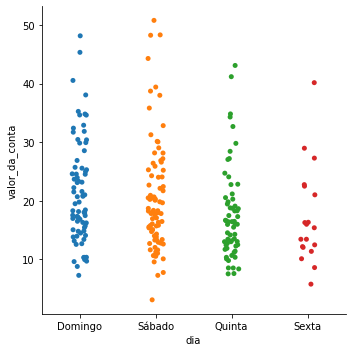

In [61]:
sns.catplot(x='dia', y= 'valor_da_conta', data=tips)

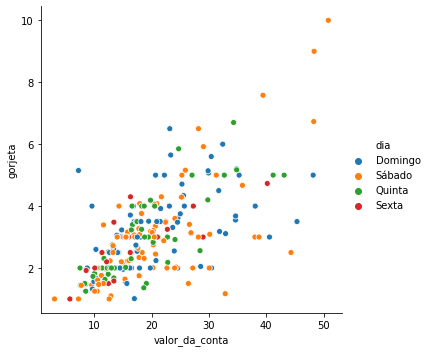

In [62]:
sns.relplot(x='valor_da_conta', y= 'gorjeta',hue='dia', data=tips)

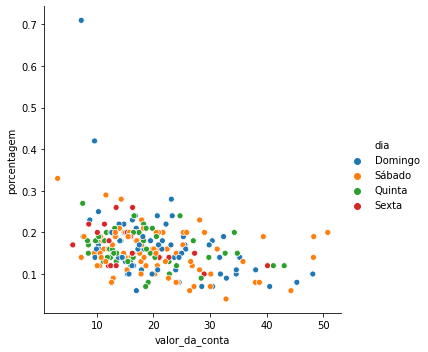

In [63]:
sns.relplot(x='valor_da_conta', y= 'porcentagem',hue='dia', data=tips)

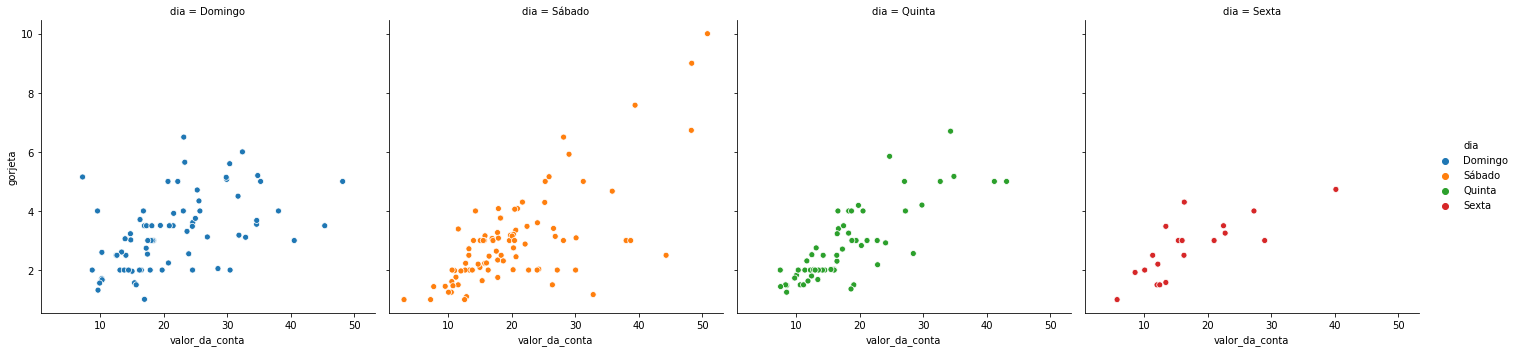

In [64]:
sns.relplot(x='valor_da_conta', y= 'gorjeta',hue='dia', col='dia', data=tips)

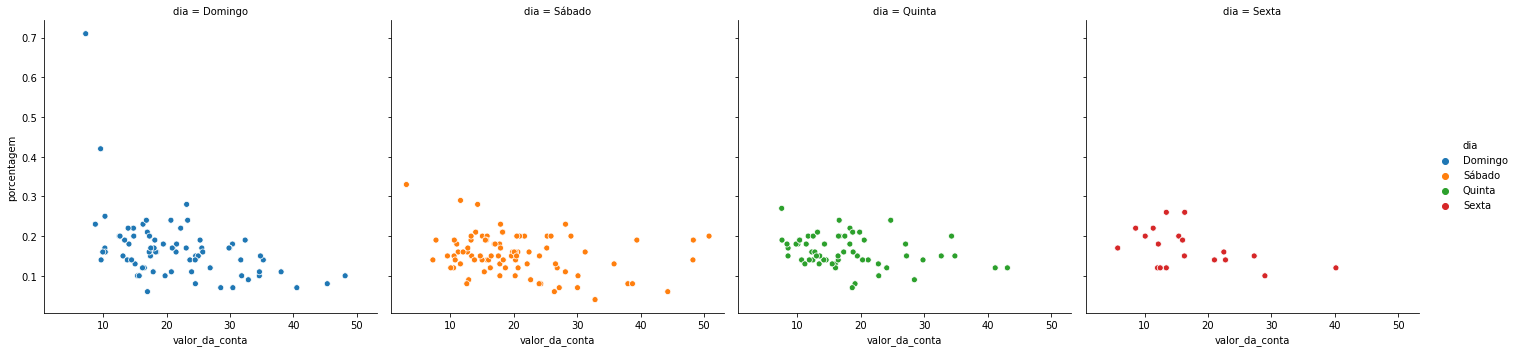

In [65]:
sns.relplot(x='valor_da_conta', y= 'porcentagem',hue='dia', col='dia', data=tips)

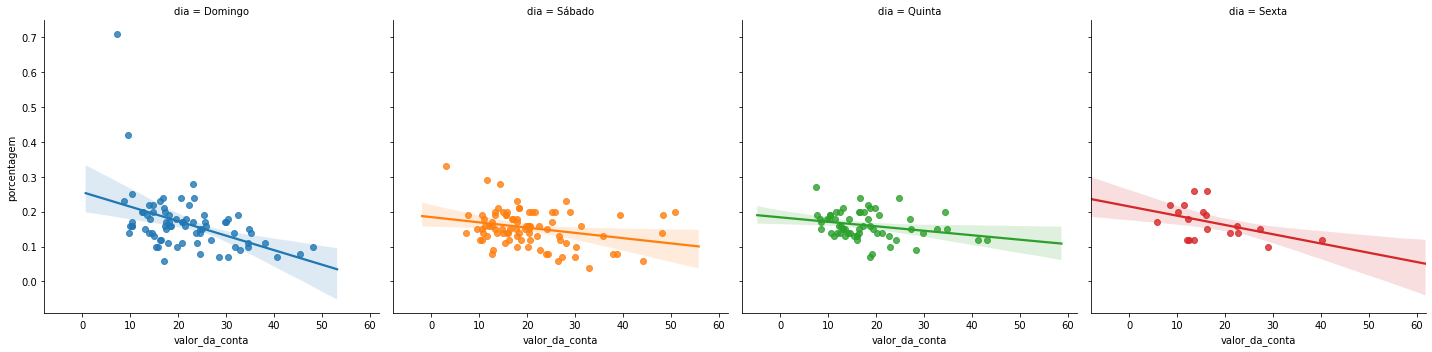

In [67]:
sns.lmplot(x='valor_da_conta', y= 'porcentagem',hue='dia', col='dia', data=tips)

In [76]:
media_geral_gorjetas = tips.gorjeta.mean()
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


In [77]:
tips.groupby(['dia']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [78]:
tips.groupby(['dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]
#Retirando uma coluna momentaneamente. 

,valor_da_conta,gorjeta,porcentagem
dia,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [80]:
print('Frenquencia dos dia')
tips.dia.value_counts()

Frenquencia dos dia


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia, dtype: int64

#Teste de hipótese

**H<sup>null</sup>**
>A distribuição do valor da conta é igual no sábado e no domingo.

**H<sup>alt</sup>**
>A distribuição do valor da conta não é igual no sábado e no domingo.

In [83]:
conta_domingo = tips.query("dia == 'Domingo'").valor_da_conta

In [84]:
conta_sabado = tips.query("dia == 'Sábado'").valor_da_conta

In [89]:
r2 = ranksums(conta_domingo,conta_sabado)

**H<sup>null</sup>**
>A distribuição do valor da conta é igual no sábado e no domingo.

In [90]:
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


In [91]:
tips.head()

,valor_da_conta,gorjeta,sobremesa,dia,horario,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


#Análise IV - Hora do dia

In [92]:
tips.horario.unique()

array(['Jantar', 'Almoço'], dtype=object)

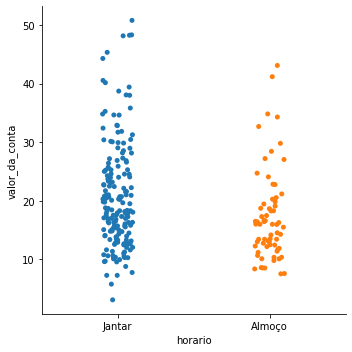

In [93]:
sns.catplot(x='horario', y='valor_da_conta', data=tips)

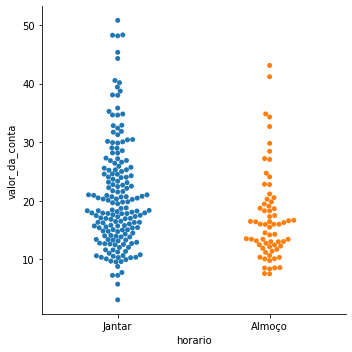

In [94]:
sns.catplot(x='horario', y='valor_da_conta',kind='swarm', data=tips)

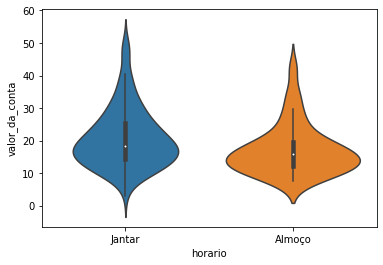

In [95]:
sns.violinplot(x='horario', y='valor_da_conta', data=tips)

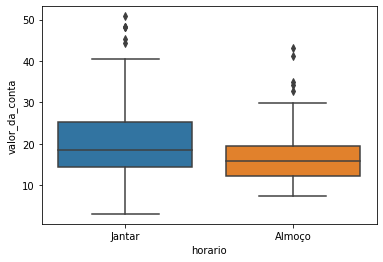

In [96]:
sns.boxplot(x='horario', y='valor_da_conta', data=tips)

In [99]:
almoco = tips.query("horario == 'Almoço'").valor_da_conta

In [100]:
jantar = tips.query("horario == 'Jantar'").valor_da_conta

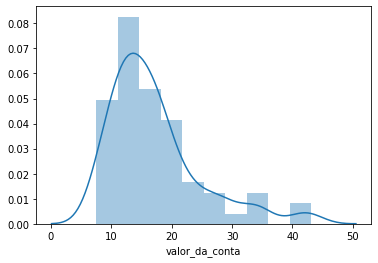

In [104]:
sns.distplot(almoco)

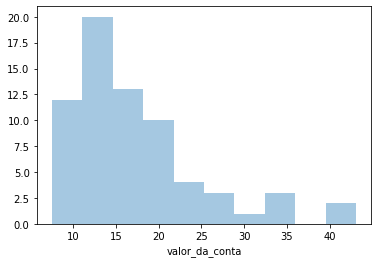

In [105]:
sns.distplot(almoco, kde=False)

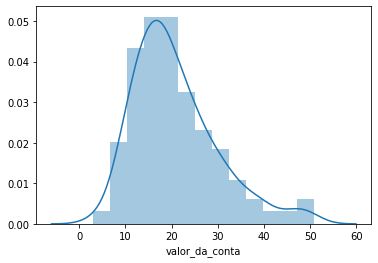

In [106]:
sns.distplot(jantar)

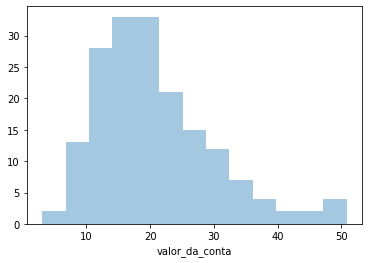

In [107]:
sns.distplot(jantar, kde=False)

In [110]:
tips.groupby(['horario']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
horario,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


#Teste de hipótese

**H<sup>null</sup>**
>A distribuição do valor da conta é igual no almoço e no jantar.

**H<sup>alt</sup>**
>A distribuição do valor da conta não é igual no almoço e no jantar.

In [111]:
r3 = ranksums(almoco, jantar)

In [112]:
print('O valor do p-value é {}'.format(r3.pvalue))

O valor do p-value é 0.0011791039723641672


**H<sup>alt</sup>**
>A distribuição do valor da conta não é igual no almoço e no jantar.

In [116]:
porcentagem_almoco = tips.query("horario == 'Almoço'").porcentagem

In [117]:
porcentagem_jantar = tips.query("horario == 'Jantar'").porcentagem

In [120]:
r4=ranksums(porcentagem_almoco, porcentagem_jantar)


**H<sup>null</sup>**
>A distribuição da taxa da gorjeta é igual no almoço e no jantar.

In [121]:
print('O valor do p-value é {}'.format(r4.pvalue))

O valor do p-value é 0.2602493995587126
